<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall_2025/blob/main/Module%202/2_Decision_Trees_JARVIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Tutorial notebook for the Fall 2025 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.
- Adaptation of the notebook for JARVIS by Aditya Raghavan
- Instructor Sergei V. Kalinin

This notebook is an example of how Classification can be done on actual materials data. This is very similar to the IRIS dataset

The data for this example are from the [JARVIS](https://jarvis.nist.gov/#Databases),

The JARVIS (Joint Automated Repository for Various Integrated Simulations) is an infrastructure designed to automate materials discovery and optimization using classical force-field, density functional theory, machine learning, quantum computation calculations and experiments.

First, we make all necessary imports:

# Classification: DFT dataset from JARVIS

In [1]:
!pip -q install jarvis-tools matminer pymatgen scikit-learn seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.1/754.1 kB 44.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from jarvis.db.figshare import data
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

Let's load data set from JARVIS database


In [3]:
jarvis = pd.DataFrame(data("dft_3d"))

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:02<00:00, 15.7MiB/s]


Loading the zipfile...
Loading completed.


Excercise:
- Explore the structure of the data set. What does it contain?
- For example, explore keys, items, etc. What are data types and dimensions?
- What does data set represent?

In [4]:
print("Type:", type(jarvis))
print("Shape (rows, cols):", jarvis.shape)
print("First 25 column names:", jarvis.columns[:25].tolist())

Type: <class 'pandas.core.frame.DataFrame'>
Shape (rows, cols): (75993, 64)
First 25 column names: ['jid', 'spg_number', 'spg_symbol', 'formula', 'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms', 'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor', 'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes']


In [5]:
display(jarvis.head())

,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,density,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search
0,JVASP-90856,129,P4/nmm,TiCuSiAs,-0.42762,OptB88vdW,0.000,"{'lattice_mat': [[3.566933224304235, 0.0, -0.0...",na,0.0,...,5.956,na,[],8,na,na,na,na,mp-1080455,-As-Cu-Si-Ti
1,JVASP-86097,221,Pm-3m,DyB6,-0.41596,OptB88vdW,0.000,"{'lattice_mat': [[4.089078911208881, 0.0, 0.0]...",na,0.0,...,5.522,na,"[OPT-LOPTICS,JVASP-86097.zip,https://ndownload...",7,na,na,na,na,mp-568319,-B-Dy
2,JVASP-64906,119,I-4m2,Be2OsRu,0.04847,OptB88vdW,0.000,"{'lattice_mat': [[-1.833590720595598, 1.833590...",na,0.0,...,10.960,na,"[OPT-LOPTICS,JVASP-64906.zip,https://ndownload...",4,na,na,na,na,auid-3eaf68dd483bf4f4,-Be-Os-Ru
3,JVASP-98225,14,P2_1/c,KBi,-0.44140,OptB88vdW,0.472,"{'lattice_mat': [[7.2963518353359165, 0.0, 0.0...",na,0.0,...,5.145,na,[],32,na,na,na,na,mp-31104,-Bi-K
4,JVASP-10,164,P-3m1,VSe2,-0.71026,OptB88vdW,0.000,"{'lattice_mat': [[1.6777483798834445, -2.90594...",na,0.0,...,5.718,0.23,"[FD-ELAST,JVASP-10.zip,https://ndownloader.fig...",3,48.79,33.05,0.0,na,mp-694,-Se-V


Find the space group column and create labels. We'll use this later

In [6]:
print(jarvis.columns.tolist())

['jid', 'spg_number', 'spg_symbol', 'formula', 'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms', 'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor', 'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh', 'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz', 'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg', 'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij', 'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric', 'dfpt_piezo_max_dielectric_electronic', 'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode', 'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond', 'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality', 'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv', 'mbj_bandgap', 'hse_gap', 'reference', 'search']


In [7]:
df2 = jarvis['exfoliation_energy'].dropna()
df2

,exfoliation_energy
0,na
1,na
2,na
3,na
4,83.78
...,...
75988,na
75989,na
75990,na
75991,na


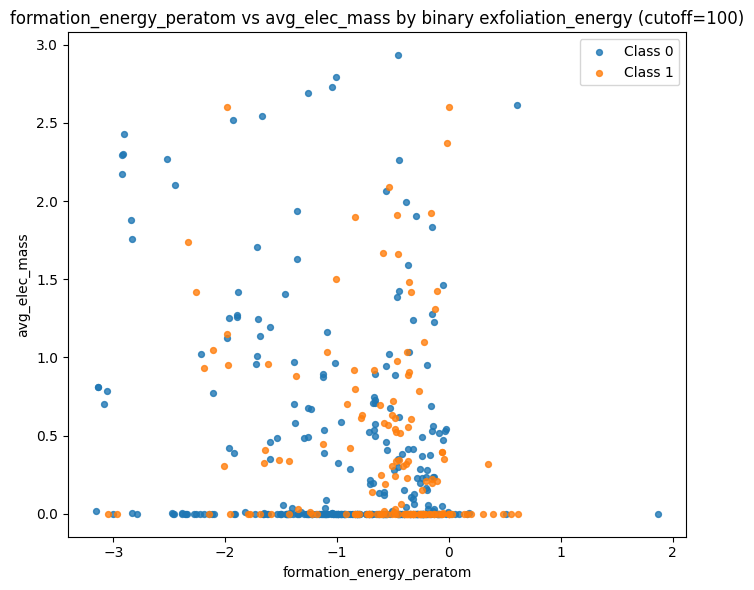

In [8]:
# === choose your columns ===
F1 = 'formation_energy_peratom'
F2 = 'avg_elec_mass'
TARGET = 'exfoliation_energy'          # numeric target to binarize
CUTOFF = 100               # label = 1 if TARGET >= CUTOFF else 0

# 1) Copy just the three columns
df = jarvis[[F1, F2, TARGET]].copy()

# 2) Coerce to numeric and drop rows with any NaNs
for c in [F1, F2, TARGET]:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df = df.dropna()

# 3) Make binary target
df['y'] = (df[TARGET] >= CUTOFF).astype(int)

# 4) Plot
plt.figure(figsize=(7,6))
plt.scatter(df.loc[df['y']==0, F1], df.loc[df['y']==0, F2], s=18, alpha=0.8, label='Class 0')
plt.scatter(df.loc[df['y']==1, F1], df.loc[df['y']==1, F2], s=18, alpha=0.8, label='Class 1')
plt.xlabel(F1); plt.ylabel(F2)
plt.title(f'{F1} vs {F2} by binary {TARGET} (cutoff={CUTOFF})')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
spg_col = "spg_number" if "spg_number" in jarvis.columns else (
          "spacegroup_number" if "spacegroup_number" in jarvis.columns else None)
print("space-group column:", spg_col)

space-group column: spg_number


In [10]:
cols_to_show = ["formula"] + ([spg_col] if spg_col else [])
display(jarvis[cols_to_show].head(10))

# Basic stats on the space-group numbers
if spg_col:
    display(jarvis[spg_col].describe())

,formula,spg_number
0,TiCuSiAs,129
1,DyB6,221
2,Be2OsRu,119
3,KBi,14
4,VSe2,164
5,TbMnSi,62
6,Ba4NaBi,216
7,SrFeO3,221
8,LuNi4Sn,216
9,MoW3Se2S6,156


,spg_number
count,75993
unique,213
top,225
freq,7662


In [11]:
ep = ElementProperty.from_preset("magpie")

def featurize_formula(f):
    try:
        return ep.featurize(Composition(f))
    except Exception:
        return None

# Small sample for quick plotting
sample = jarvis.sample(600, random_state=0).reset_index(drop=True)

feat_list = sample["formula"].apply(featurize_formula)
sample = sample[feat_list.notnull()].reset_index(drop=True)
F = pd.DataFrame(feat_list.dropna().tolist(), columns=ep.feature_labels())

print("Total Magpie features available:", F.shape[1])


/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


Total Magpie features available: 132


There are 132 features identified from the dataset we imported

In [12]:
# Helper to robustly pick feature columns by tokens
def pick_col(cols, tokens):
    tokens = [t.lower() for t in tokens]
    for c in cols:
        s = c.lower().replace(" ", "")
        if all(t in s for t in tokens):
            return c
    raise ValueError(f"Couldn't find feature containing tokens: {tokens}")

# Choose FOUR intuitive features (you can add more)
chosen = [
    pick_col(F.columns, ["mean","number"]),           # mean atomic number
    pick_col(F.columns, ["mean","electroneg"]),       # mean electronegativity
    pick_col(F.columns, ["mean","mendeleev"]),        # mean Mendeleev number
    pick_col(F.columns, ["mean","atomic","weight"]),  # mean atomic weight
]
F4 = F[chosen].copy()
F4.columns = ["Mean atomic number", "Mean electronegativity",
              "Mean Mendeleev number", "Mean atomic weight"]


,formula,Mean atomic number,Mean electronegativity,Mean Mendeleev number,Mean atomic weight
0,Li5WNO4,11.636364,2.187273,44.181818,26.959027
1,SmMgIn,41.000000,1.420000,55.333333,96.494333
2,SrCa,29.000000,0.975000,7.500000,63.849000
3,BeNbV,22.666667,1.600000,53.333333,50.953354
4,YGaAu,49.666667,1.856667,50.666667,118.531806


materials_data shape: (600, 5)


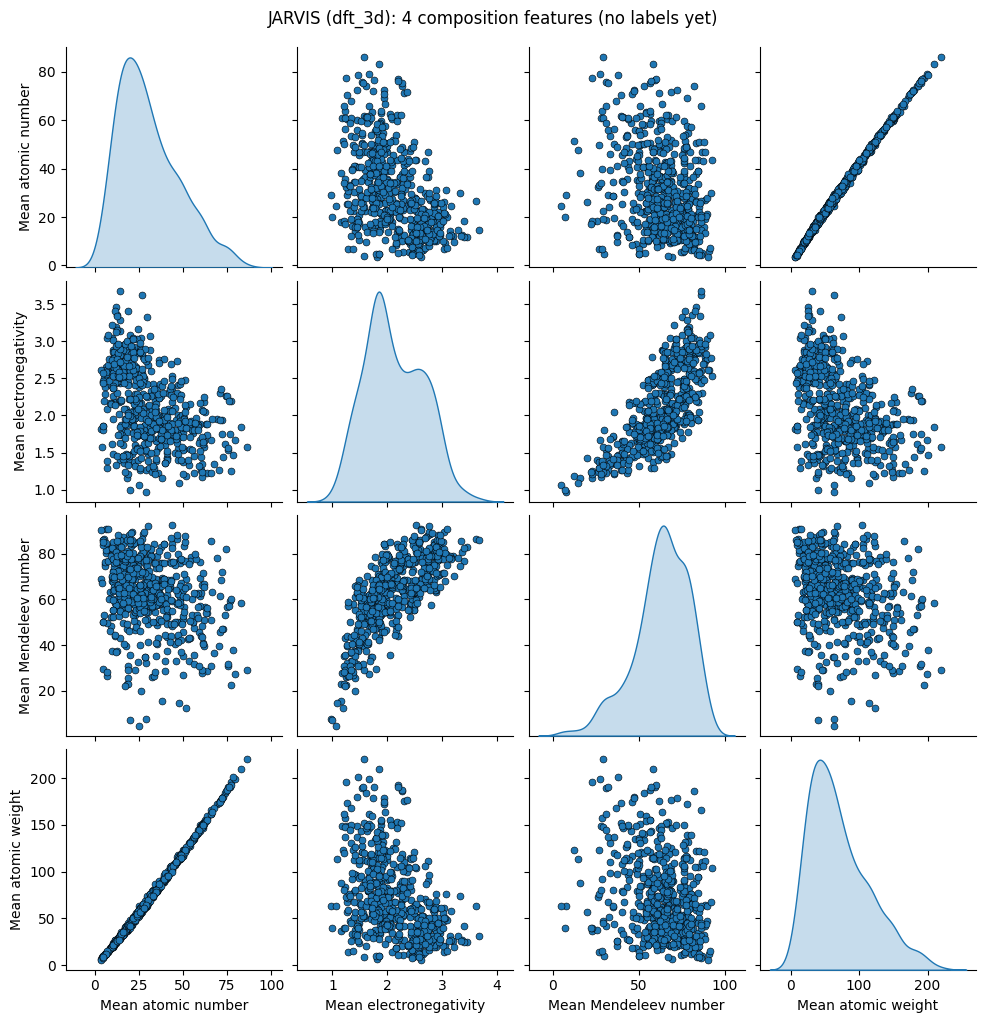

In [13]:
materials_data = pd.concat([sample[["formula"]].reset_index(drop=True), F4], axis=1)
display(materials_data.head())
print("materials_data shape:", materials_data.shape)

# --- Pairplot BEFORE labels (pure EDA) ---
sns.pairplot(F4, corner=False, diag_kind="kde", plot_kws=dict(edgecolor="k", s=25))
plt.suptitle("JARVIS (dft_3d): 4 composition features (no labels yet)", y=1.02)
plt.show()

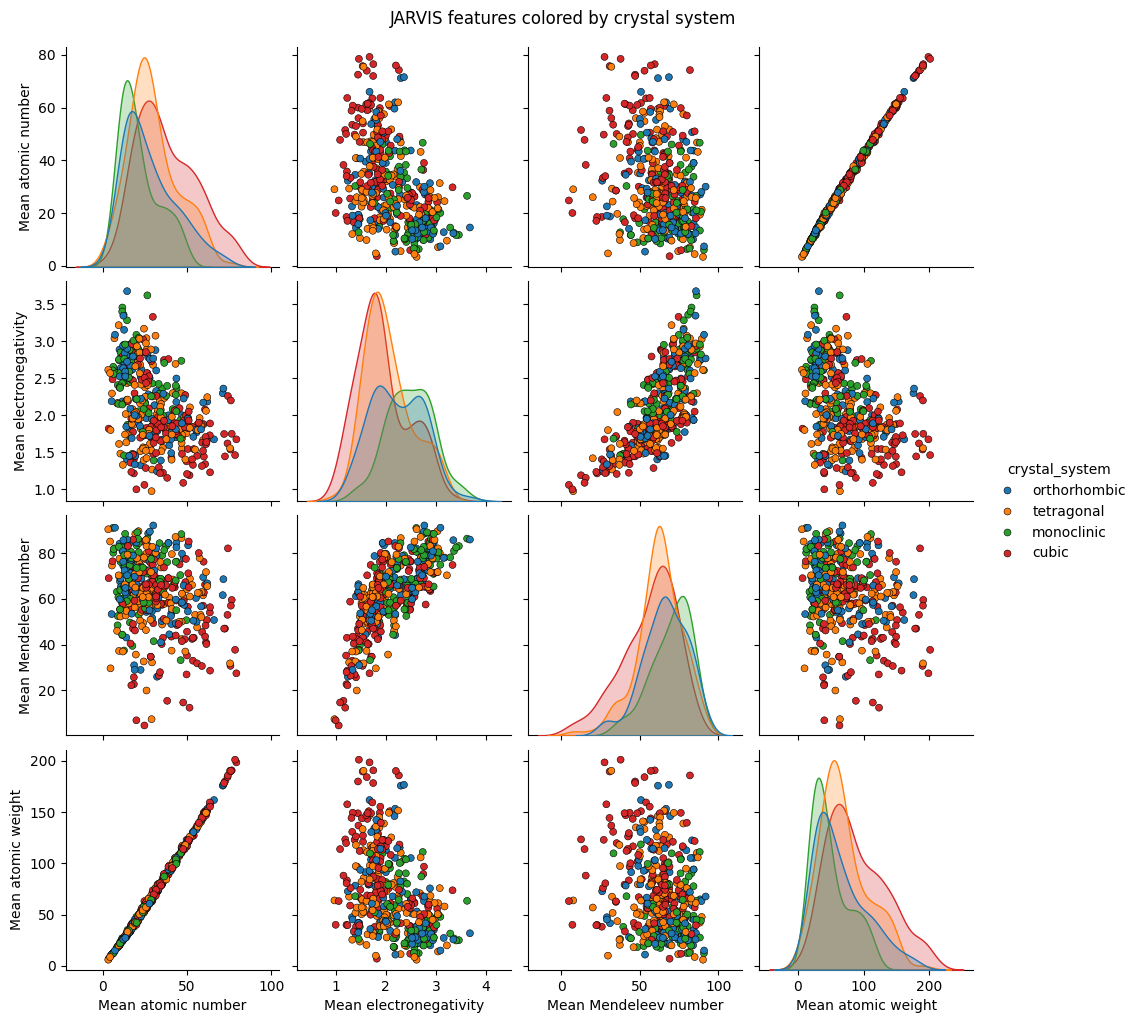

In [14]:
if spg_col is not None:
    def sg_to_sys(n):
        n = int(n)
        if 1<=n<=2:   return "triclinic"
        if 3<=n<=15:  return "monoclinic"
        if 16<=n<=74: return "orthorhombic"
        if 75<=n<=142:return "tetragonal"
        if 143<=n<=167:return "trigonal"
        if 168<=n<=194:return "hexagonal"
        if 195<=n<=230:return "cubic"

    tmp = sample[[spg_col]].copy()
    tmp["crystal_system"] = tmp[spg_col].astype(int).map(sg_to_sys)
    eda_lbl = pd.concat([F4.reset_index(drop=True), tmp["crystal_system"].reset_index(drop=True)], axis=1).dropna()

    # (Optional) keep a few common systems so the legend is readable
    keep = eda_lbl["crystal_system"].value_counts().index[:4]
    eda_lbl = eda_lbl[eda_lbl["crystal_system"].isin(keep)]

    sns.pairplot(eda_lbl, vars=F4.columns.tolist(),
                 hue="crystal_system", corner=False,
                 diag_kind="kde", plot_kws=dict(edgecolor="k", s=25))
    plt.suptitle("JARVIS features colored by crystal system", y=1.02)
    plt.show()


Turn space groups into crystal-system labels (and pick 3 classes)

In [15]:
# Map space-group number -> crystal system (7 possible)
def sg_to_sys(n: int):
    if 1<=n<=2:   return "triclinic"
    if 3<=n<=15:  return "monoclinic"
    if 16<=n<=74: return "orthorhombic"
    if 75<=n<=142:return "tetragonal"
    if 143<=n<=167:return "trigonal"
    if 168<=n<=194:return "hexagonal"
    if 195<=n<=230:return "cubic"

# Build a small table: formula + crystal_system
df_cs = jarvis[["formula", spg_col]].dropna().copy()
df_cs[spg_col] = df_cs[spg_col].astype(int)
df_cs["crystal_system"] = df_cs[spg_col].map(sg_to_sys)

# 2) Keep a clean binary problem: cubic vs hexagonal
df_cs = df_cs[df_cs["crystal_system"].isin(["cubic","hexagonal"])].copy()

# 3) Balance the classes (tidy plots; fast runtime)
N_PER = 120
df_cs = (df_cs.groupby("crystal_system", group_keys=False)
               .apply(lambda g: g.sample(min(len(g), N_PER), random_state=1))
               .reset_index(drop=True))

print(df_cs["crystal_system"].value_counts())


crystal_system
cubic        120
hexagonal    120
Name: count, dtype: int64


/tmp/ipython-input-2631109086.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(len(g), N_PER), random_state=1))


Let's build two simple composition features

In [16]:
# We’ll featurize the chemical formula using Matminer (Magpie preset)
ep = ElementProperty.from_preset("magpie")

def featurize_formula(f):
    try:
        return ep.featurize(Composition(f))
    except Exception:
        return None

feat = df_cs["formula"].apply(featurize_formula)
mask = feat.notnull()
df_cs = df_cs[mask].reset_index(drop=True)

F = pd.DataFrame(list(feat[mask]), columns=ep.feature_labels())

def pick_col(cols, tokens):
    tokens = [t.lower() for t in tokens]
    for c in cols:
        s = c.lower().replace(" ", "")
        if all(t in s for t in tokens):
            return c
    raise ValueError(f"Couldn't find a feature with tokens {tokens}")

colA = pick_col(F.columns, ["mean","mendeleev"])
colB = pick_col(F.columns, ["mean","number"])

X_raw = F[[colA, colB]].to_numpy(float)
feature_names = ["Mean Mendeleev number", "Mean atomic number"]

# Labels 0/1 (Iris-style)
classes = ["cubic","hexagonal"]
label_map = {c:i for i,c in enumerate(classes)}
y = df_cs["crystal_system"].map(label_map).to_numpy()

print("Feature pair:", feature_names)
print("X_raw shape:", X_raw.shape, "| y shape:", y.shape, "| class map:", {i:c for c,i in label_map.items()})


/usr/local/lib/python3.12/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


Feature pair: ['Mean Mendeleev number', 'Mean atomic number']
X_raw shape: (240, 2) | y shape: (240,) | class map: {0: 'cubic', 1: 'hexagonal'}


Featurize compositions

In [17]:
# classes = sorted(np.unique(y_text))
# label_map = {c:i for i,c in enumerate(classes)}
# y = np.array([label_map[t] for t in y_text], dtype=int)

# # Standardize (helps visualization; trees don’t require it)
# scaler = StandardScaler()
# X = scaler.fit_transform(X_raw)

# print("Classes:", {i:c for c,i in label_map.items()})
# print("X shape:", X.shape, "| y shape:", y.shape)

# Simple Decision Trees

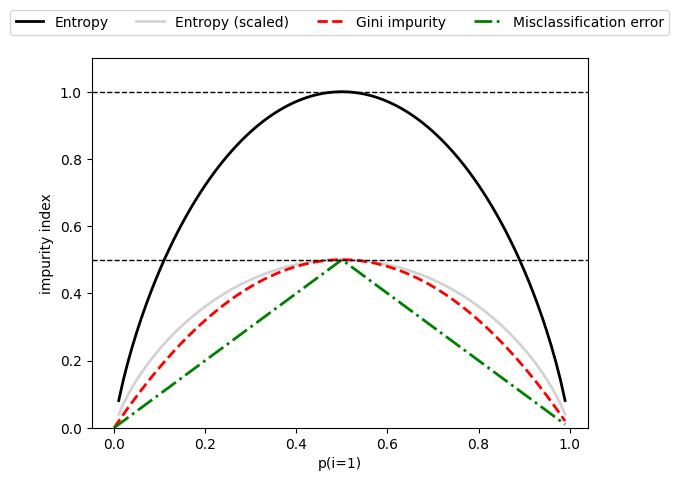

In [18]:
def gini(p):
  return p*(1 - p) + (1 - p)*(1 - (1-p))

def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)', 'Gini impurity','Misclassification error'],
 ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, class_names, resolution=0.03):
    """2D decision boundaries with percentile-based axis limits."""
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = np.nanpercentile(X[:,0], [1, 99])
    x2_min, x2_max = np.nanpercentile(X[:,1], [1, 99])
    pad = 0.5
    x1_min, x1_max = x1_min - pad, x1_max + pad
    x2_min, x2_max = x2_min - pad, x2_max + pad

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.30, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()); plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl, 0], X[y==cl, 1], alpha=0.9,
                    c=colors[idx], marker=markers[idx],
                    label=class_names[cl], edgecolor='black')

def draw_split_lines(clf, ax=None, alpha=0.8):
    """Overlay axis-aligned split lines for a 2-feature tree (scaled space)."""
    ax = ax or plt.gca()
    for feat, thr in zip(clf.tree_.feature, clf.tree_.threshold):
        if feat < 0:  # leaf
            continue
        if feat == 0:
            ax.axvline(thr, color='k', ls='--', lw=2, alpha=alpha)
        elif feat == 1:
            ax.axhline(thr, color='k', ls='--', lw=2, alpha=alpha)


**Decision Stump**

“A decision stump makes a single yes/no threshold on one feature (vertical or horizontal line). Everything on one side is class A, the other side class B.”

Depth-1 tree accuracy: 0.625


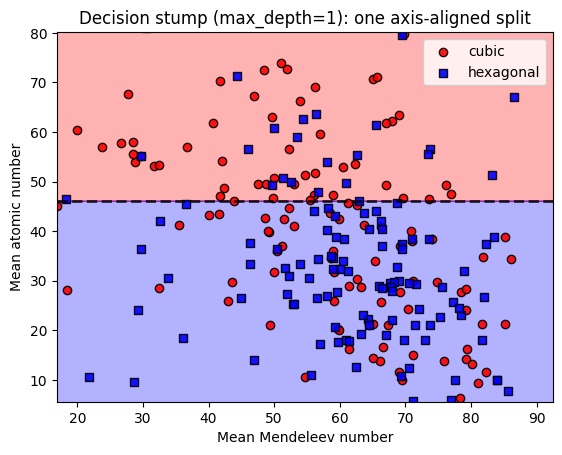

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = X_raw
# Train/test split (binary problem)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=2, stratify=y
)

stump = DecisionTreeClassifier(max_depth=1, random_state=0)
stump.fit(X_train, y_train)
print("Depth-1 tree accuracy:", stump.score(X_test, y_test))

# Plot decision regions + the single split line
plot_decision_regions(X, y, classifier=stump, class_names=classes)
draw_split_lines(stump)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("Decision stump (max_depth=1): one axis-aligned split"); plt.legend(); plt.show()




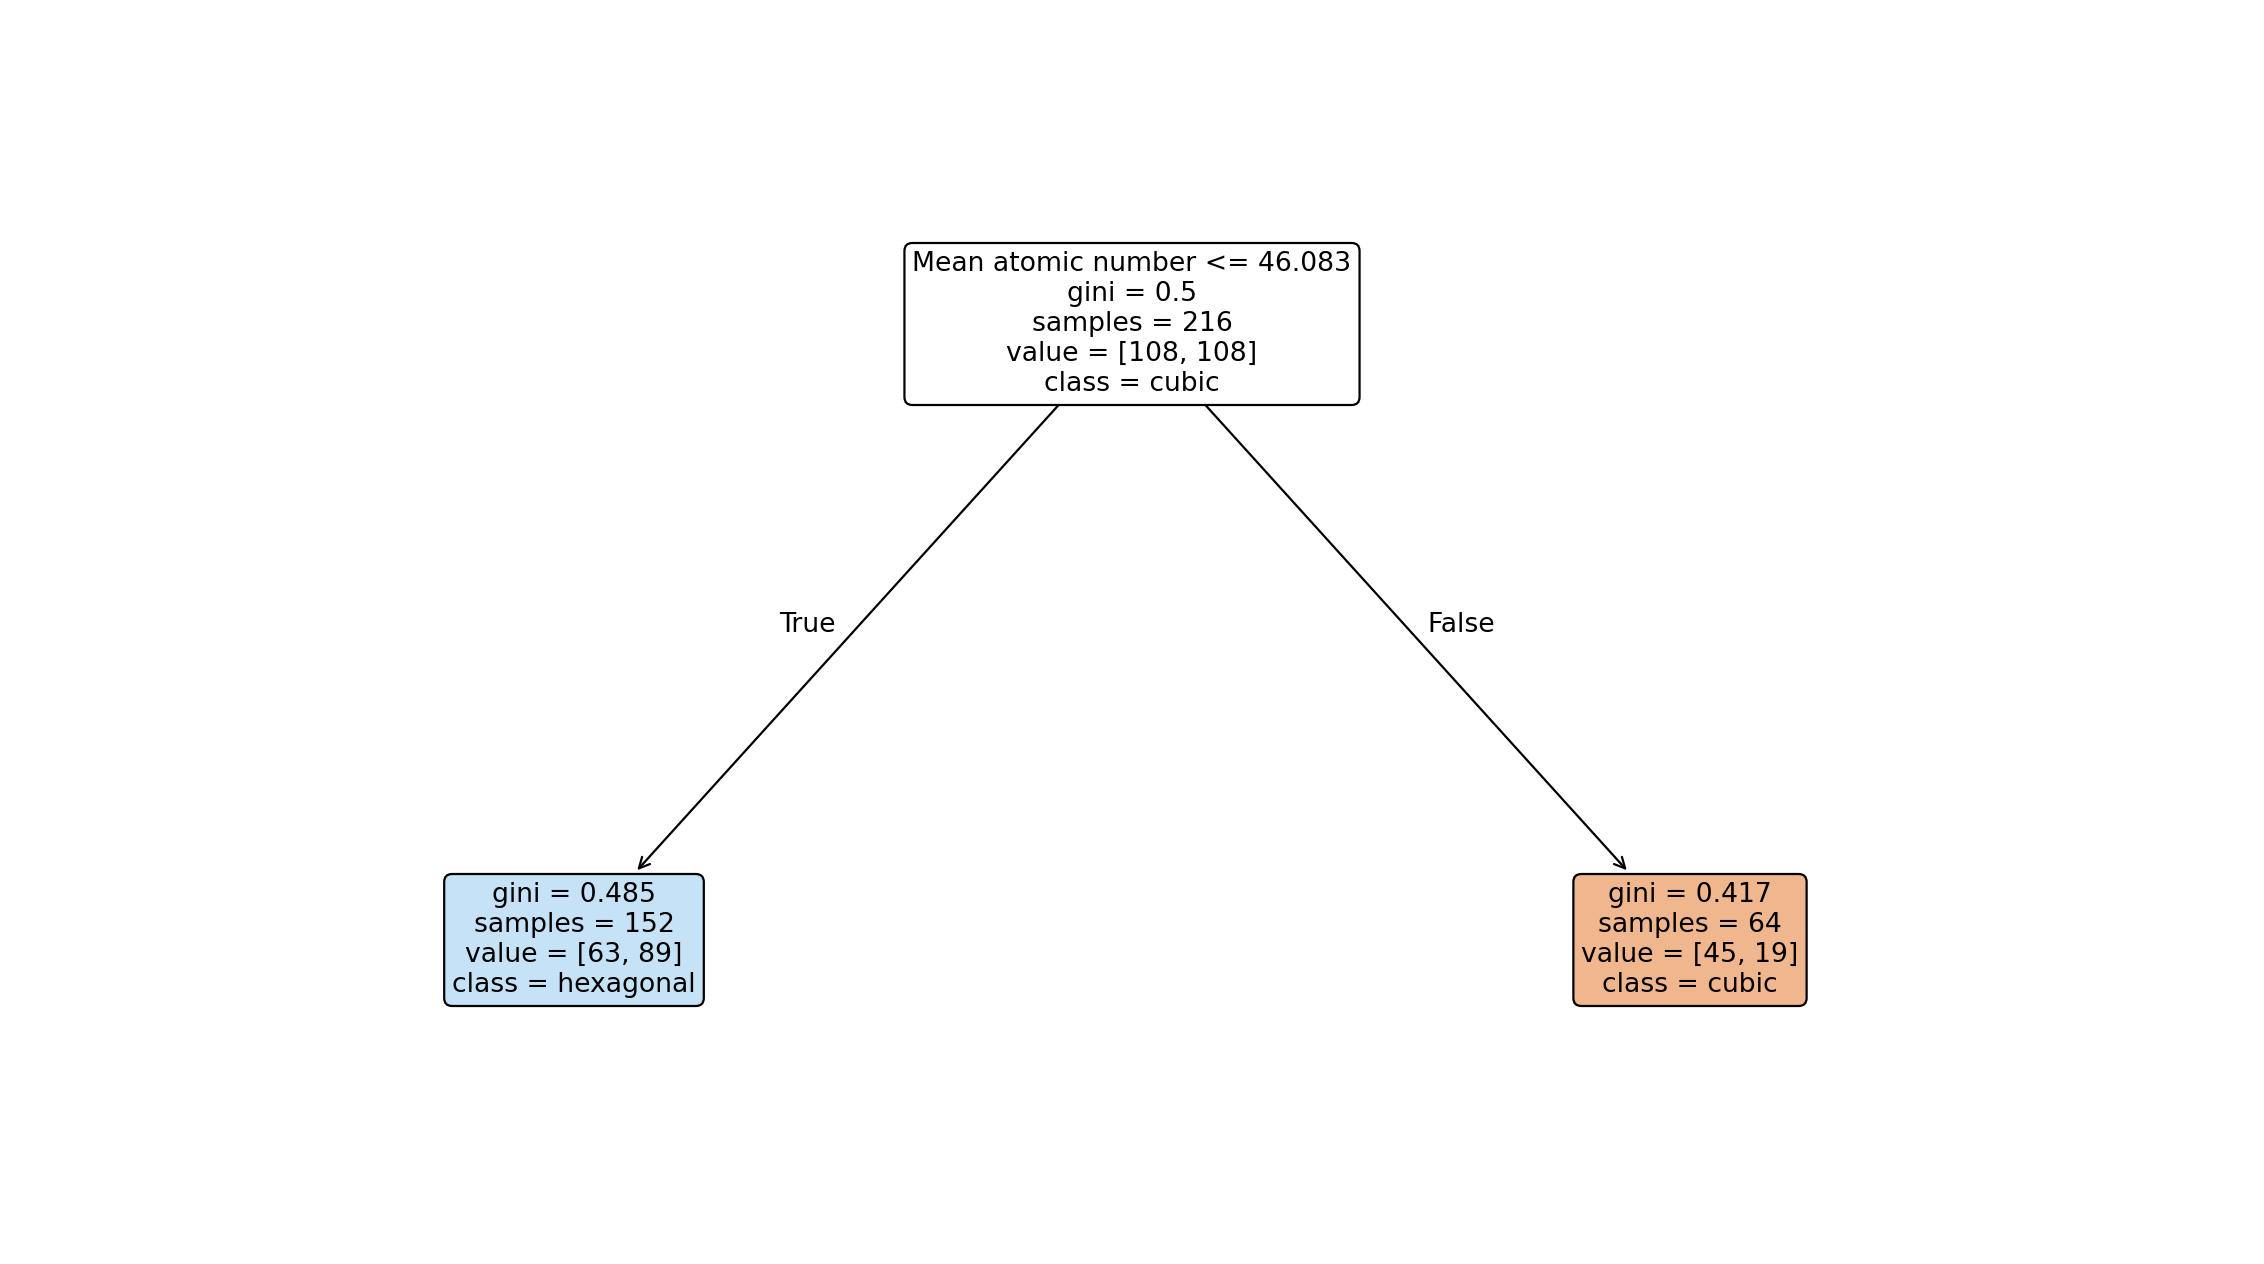

In [21]:
# Show ONLY the top levels of your trained tree and make the figure large.
fig, ax = plt.subplots(figsize=(18, 10), dpi=160)  # wider & higher-DPI
plot_tree(
    stump,              # or tree2/stump/etc.
    max_depth=1,             # show top 3 levels (adjust to 2–4)
    feature_names=[f'{feature_names[0]}', f'{feature_names[1]}'],
    class_names=classes,
    filled=True, rounded=True,
    fontsize=12,             # bigger text
    ax=ax
)
plt.show()


**Depth-2 tree: two splits (rectangles)**

Depth-2 tree accuracy: 0.625


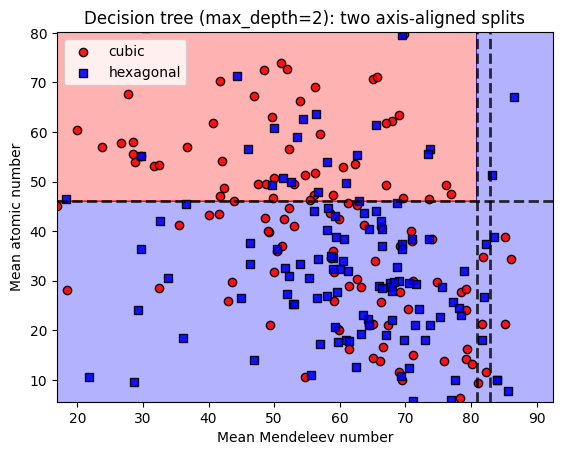

In [22]:
tree2 = DecisionTreeClassifier(max_depth=2, random_state=0)
tree2.fit(X_train, y_train)
print("Depth-2 tree accuracy:", tree2.score(X_test, y_test))

plot_decision_regions(X, y, classifier=tree2, class_names=classes)
draw_split_lines(tree2)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("Decision tree (max_depth=2): two axis-aligned splits"); plt.legend(); plt.show()




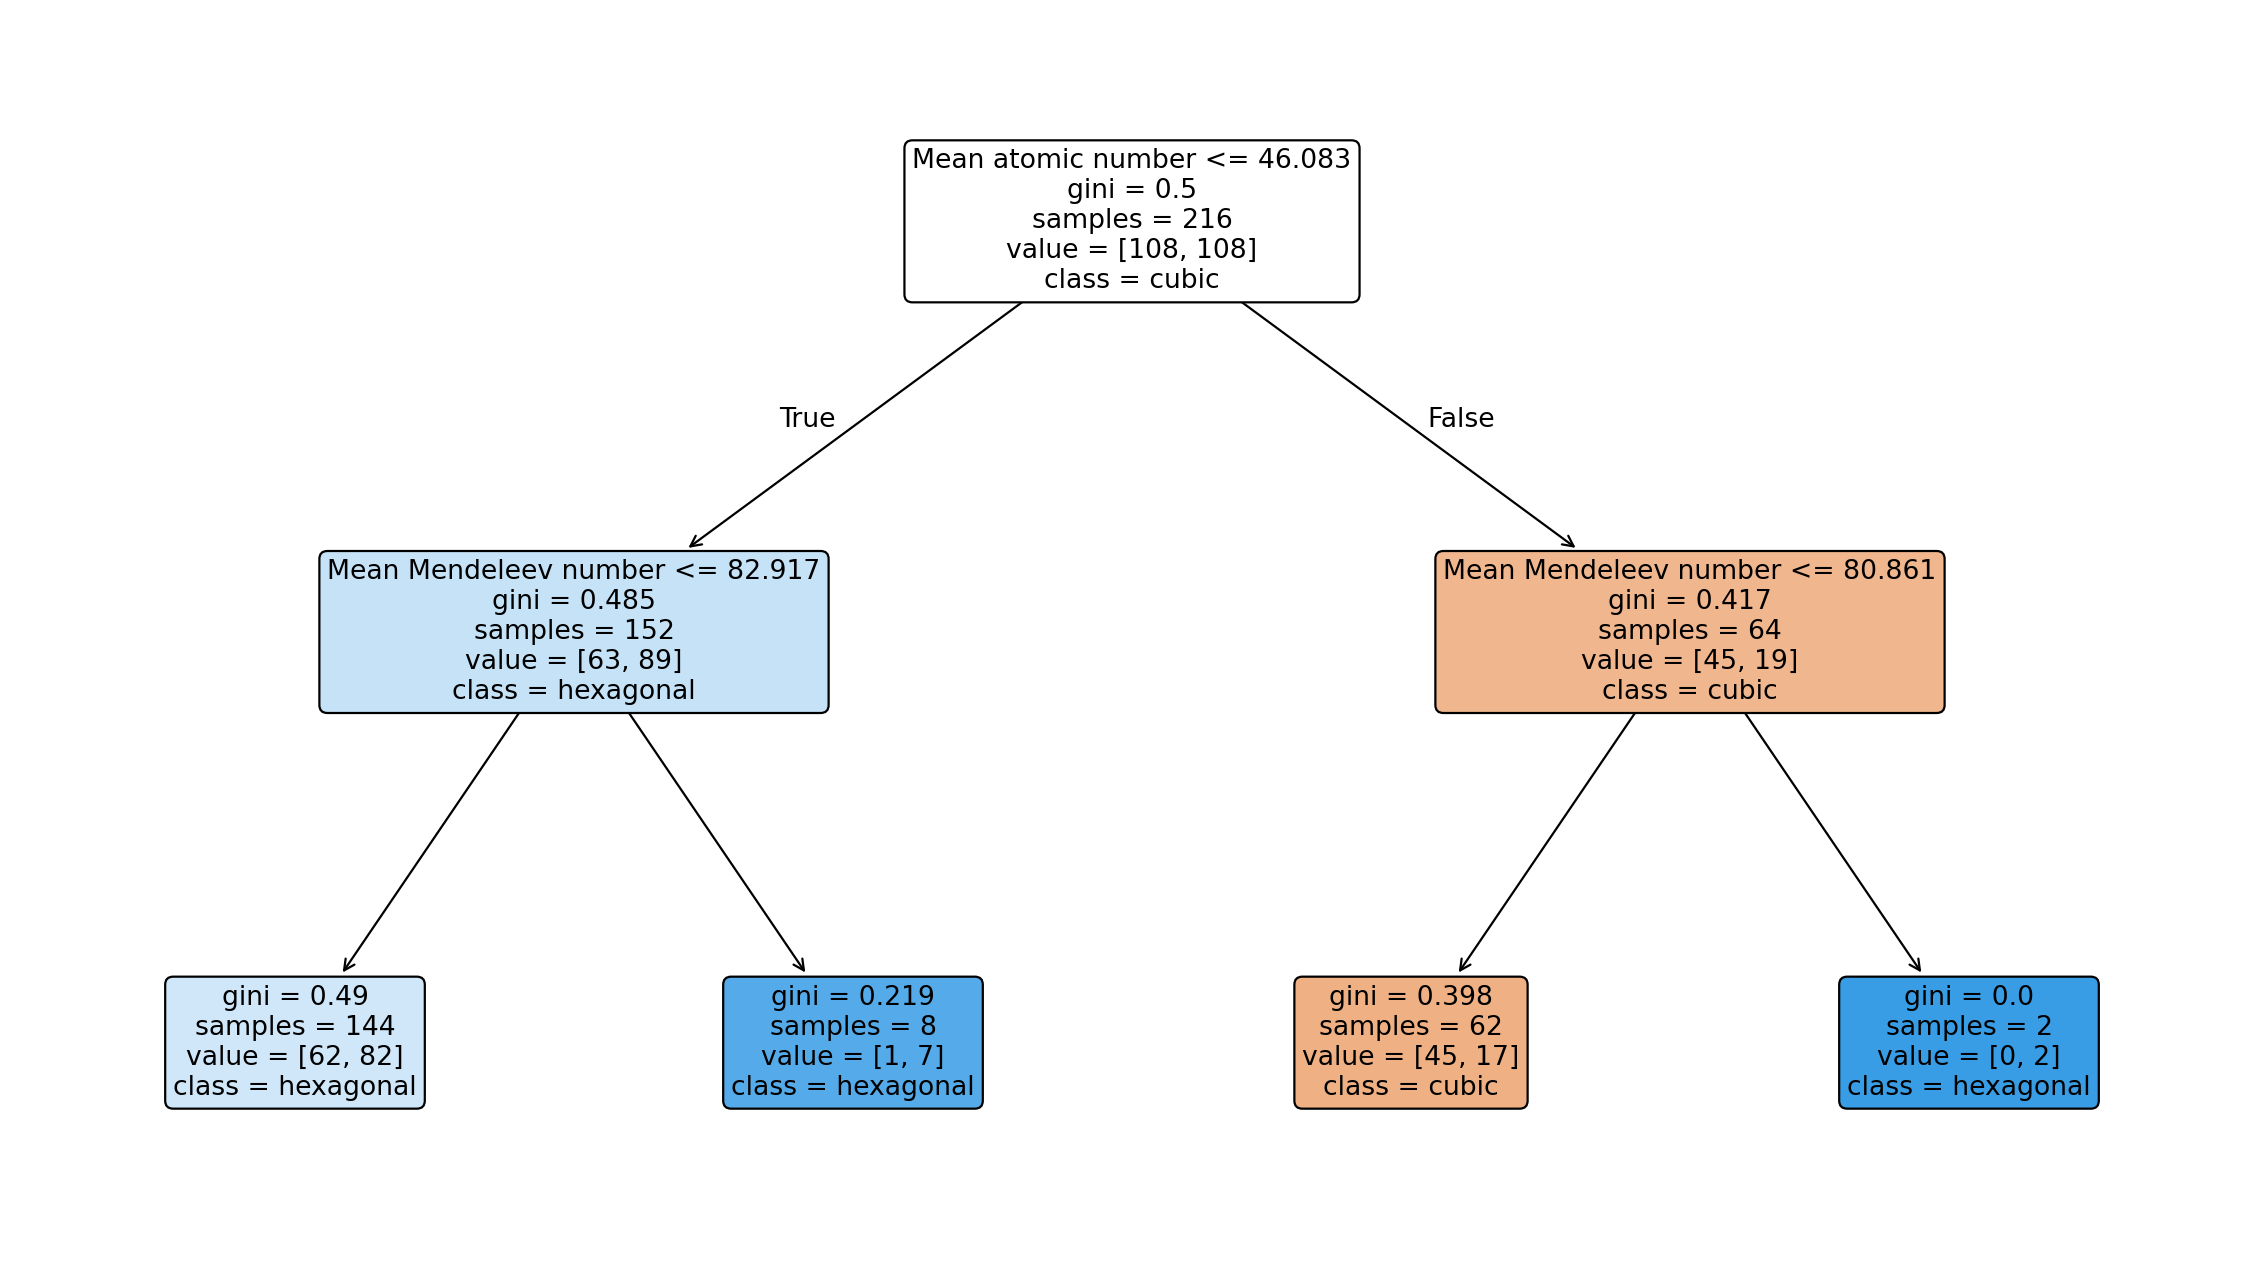

In [23]:
# Show ONLY the top levels of your trained tree and make the figure large.
fig, ax = plt.subplots(figsize=(18, 10), dpi=160)  # wider & higher-DPI
plot_tree(
    tree2,              # or tree2/stump/etc.
    max_depth=2,             # show top 3 levels (adjust to 2–4)
    feature_names=[f'{feature_names[0]}', f'{feature_names[1]}'],
    class_names=classes,
    filled=True, rounded=True,
    fontsize=12,             # bigger text
    ax=ax
)
plt.show()


**Depth-3 tree**

Depth-2 tree accuracy: 0.5833333333333334


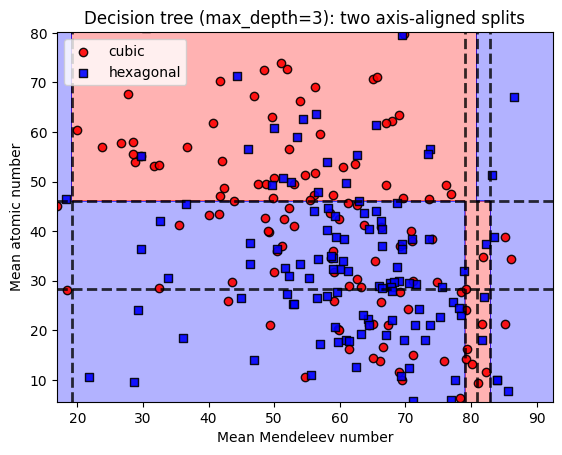

In [24]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree3.fit(X_train, y_train)
print("Depth-2 tree accuracy:", tree3.score(X_test, y_test))

plot_decision_regions(X, y, classifier=tree3, class_names=classes)
draw_split_lines(tree3)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("Decision tree (max_depth=3): two axis-aligned splits"); plt.legend(); plt.show()

# plot_tree(tree2,
#           feature_names=[f'{feature_names[0]} (scaled)', f'{feature_names[1]} (scaled)'],
#           class_names=classes, filled=True, rounded=True)
# plt.show()


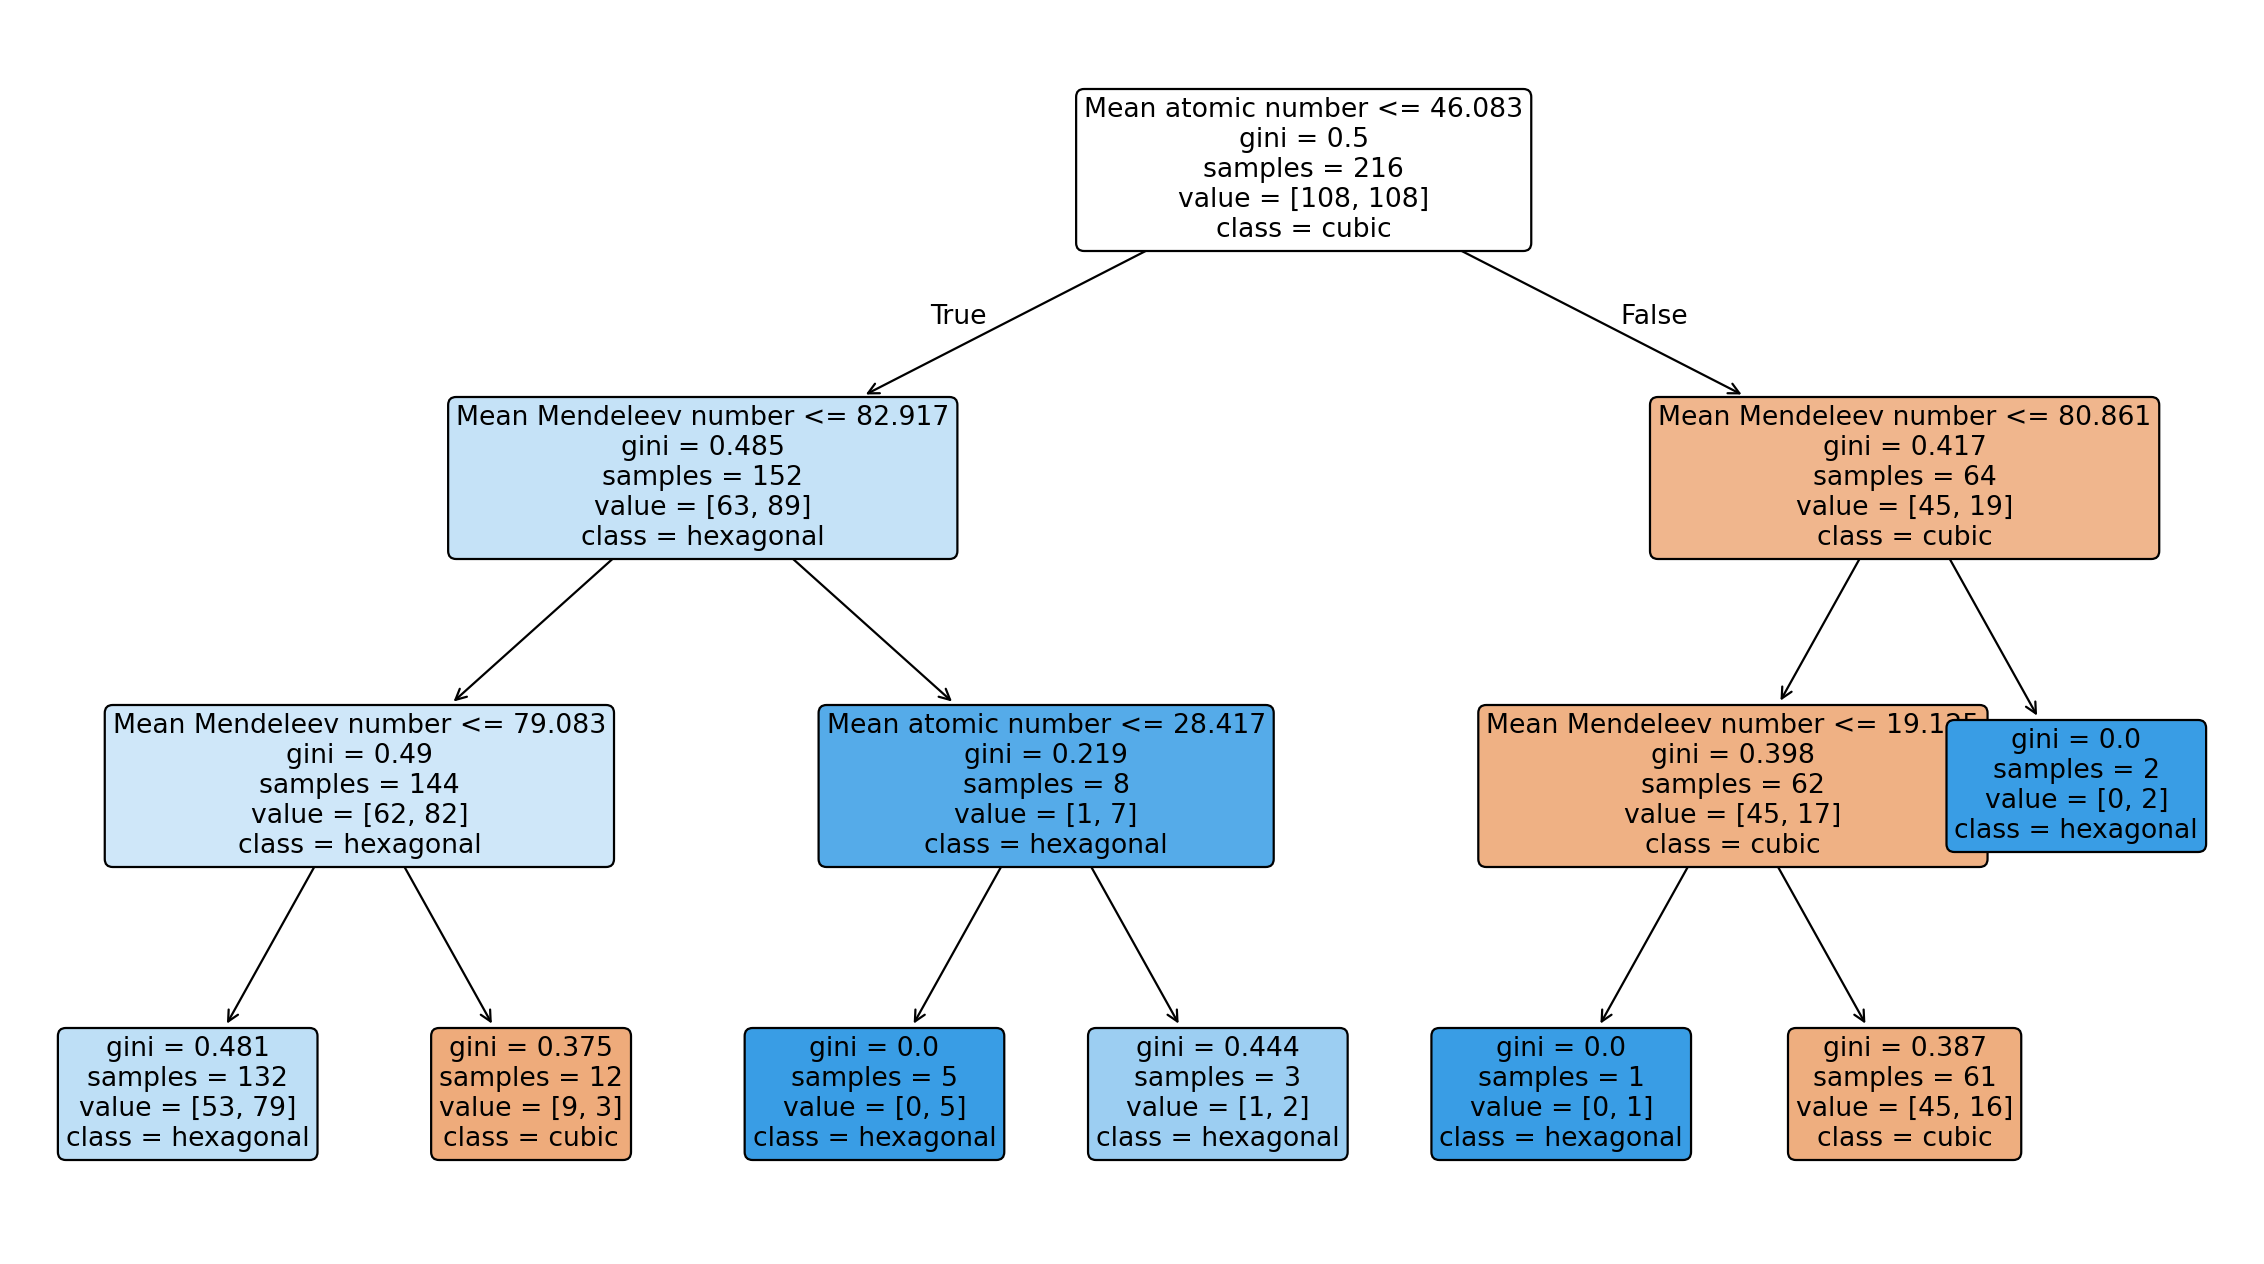

In [25]:
# Show ONLY the top levels of your trained tree and make the figure large.
fig, ax = plt.subplots(figsize=(18, 10), dpi=160)  # wider & higher-DPI
plot_tree(
    tree3,              # or tree2/stump/etc.
    max_depth=3,             # show top 3 levels (adjust to 2–4)
    feature_names=[f'{feature_names[0]}', f'{feature_names[1]}'],
    class_names=classes,
    filled=True, rounded=True,
    fontsize=12,             # bigger text
    ax=ax
)
plt.show()


**Random Forest**

Random Forest accuracy: 0.5


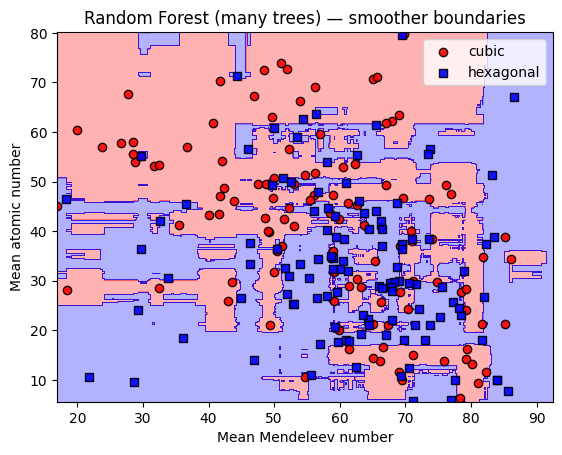

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=10, n_jobs=-1)
rf.fit(X_train, y_train)
print("Random Forest accuracy:", rf.score(X_test, y_test))

plot_decision_regions(X, y, classifier=rf, class_names=classes)
plt.xlabel(f'{feature_names[0]}'); plt.ylabel(f'{feature_names[1]}')
plt.title("Random Forest (many trees) — smoother boundaries"); plt.legend(); plt.show()


# Exercise

Try the same on different number of classes and different features

In [27]:
N_CLASSES = 3
CHOSEN_CLASSES = ["cubic","tetragonal","orthorhombic"]  # or None to auto-pick the most common
FEATURES = ("mean_mendeleev", "mean_atomic_number")     # choose any two from the list below
N_PER_CLASS = 80                                        # per-class sample size for tidy plots
# Available feature keys:
# "mean_mendeleev", "mean_atomic_number", "mean_electronegativity",
# "mean_valence_electrons", "mean_atomic_weight"

In [28]:
#@title Data Prep
%%capture
# (Installs once per runtime)
!pip -q install jarvis-tools matminer pymatgen scikit-learn

import numpy as np, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from jarvis.db.figshare import data
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition

# --- Load JARVIS (3D bulk) and find space-group column ---
jarvis = pd.DataFrame(data("dft_3d"))
spg_col = "spg_number" if "spg_number" in jarvis.columns else (
          "spacegroup_number" if "spacegroup_number" in jarvis.columns else None)
assert spg_col is not None, "No space-group column found in JARVIS dft_3d."

# --- Space group -> crystal system ---
def sg_to_sys(n: int):
    if 1<=n<=2:   return "triclinic"
    if 3<=n<=15:  return "monoclinic"
    if 16<=n<=74: return "orthorhombic"
    if 75<=n<=142:return "tetragonal"
    if 143<=n<=167:return "trigonal"
    if 168<=n<=194:return "hexagonal"
    if 195<=n<=230:return "cubic"

df = jarvis[["formula", spg_col]].dropna().copy()
df[spg_col] = df[spg_col].astype(int)
df["crystal_system"] = df[spg_col].map(sg_to_sys)
df = df.dropna(subset=["crystal_system"])

# --- Choose classes (use CHOSEN_CLASSES or auto top-N) and balance ---
if CHOSEN_CLASSES is None:
    classes_used = df["crystal_system"].value_counts().index[:N_CLASSES].tolist()
else:
    avail = [c for c in CHOSEN_CLASSES if c in set(df["crystal_system"])]
    if len(avail) < N_CLASSES:
        rest = [c for c in df["crystal_system"].value_counts().index if c not in avail]
        avail += rest[:(N_CLASSES - len(avail))]
    classes_used = avail[:N_CLASSES]

df = df[df["crystal_system"].isin(classes_used)].copy()
df = (df.groupby("crystal_system", group_keys=False)
        .apply(lambda g: g.sample(min(len(g), N_PER_CLASS), random_state=0))
        .reset_index(drop=True))

# --- Featurize compositions (Matminer / Magpie) ---
ep = ElementProperty.from_preset("magpie")
def featurize_formula(f):
    try:
        return ep.featurize(Composition(f))
    except Exception:
        return None

feat_list = df["formula"].apply(featurize_formula)
mask_ok = feat_list.notnull()
df = df[mask_ok].reset_index(drop=True)
F = pd.DataFrame(feat_list.dropna().tolist(), columns=ep.feature_labels())

# Map simple keys -> Magpie column tokens
TOKEN_MAP = {
    "mean_mendeleev":        ["mean","mendeleev"],
    "mean_atomic_number":    ["mean","number"],
    "mean_electronegativity":["mean","electroneg"],
    "mean_valence_electrons":["mean","nvalence"],
    "mean_atomic_weight":    ["mean","atomic","weight"],
}
def pick_col_by_name(cols, key):
    tokens = [t.lower() for t in TOKEN_MAP[key]]
    for c in cols:
        s = c.lower().replace(" ", "")
        if all(t in s for t in tokens):
            return c
    raise ValueError(f"Couldn't find feature for key: {key}")

colA = pick_col_by_name(F.columns, FEATURES[0])
colB = pick_col_by_name(F.columns, FEATURES[1])
feature_names = [FEATURES[0].replace("_"," ").title(), FEATURES[1].replace("_"," ").title()]

# --- Build X, y (Iris-style), scale, and split ---
X_raw = F[[colA, colB]].to_numpy(dtype=float)
classes = sorted(classes_used)
label_map = {c:i for i,c in enumerate(classes)}
y = df["crystal_system"].map(label_map).to_numpy()

scaler = StandardScaler()
X = X_raw



In [29]:
#Adjust the test_size as needed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)


print("Classes used:", classes)
print("Chosen features:", feature_names)
print("Train size:", X_train.shape[0], " | Test size:", X_test.shape[0])


Classes used: ['cubic', 'orthorhombic', 'tetragonal']
Chosen features: ['Mean Mendeleev', 'Mean Atomic Number']
Train size: 168  | Test size: 72


In [30]:
# Adjustable depth here if you want (students can change if desired)
TREE_MAX_DEPTH = 2

Decision Tree accuracy: 0.4166666666666667


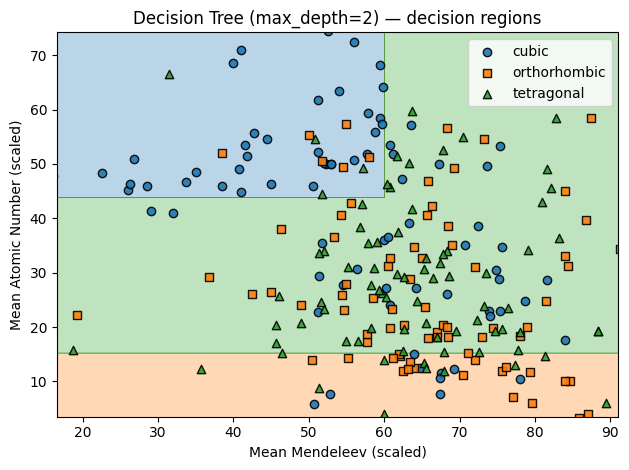

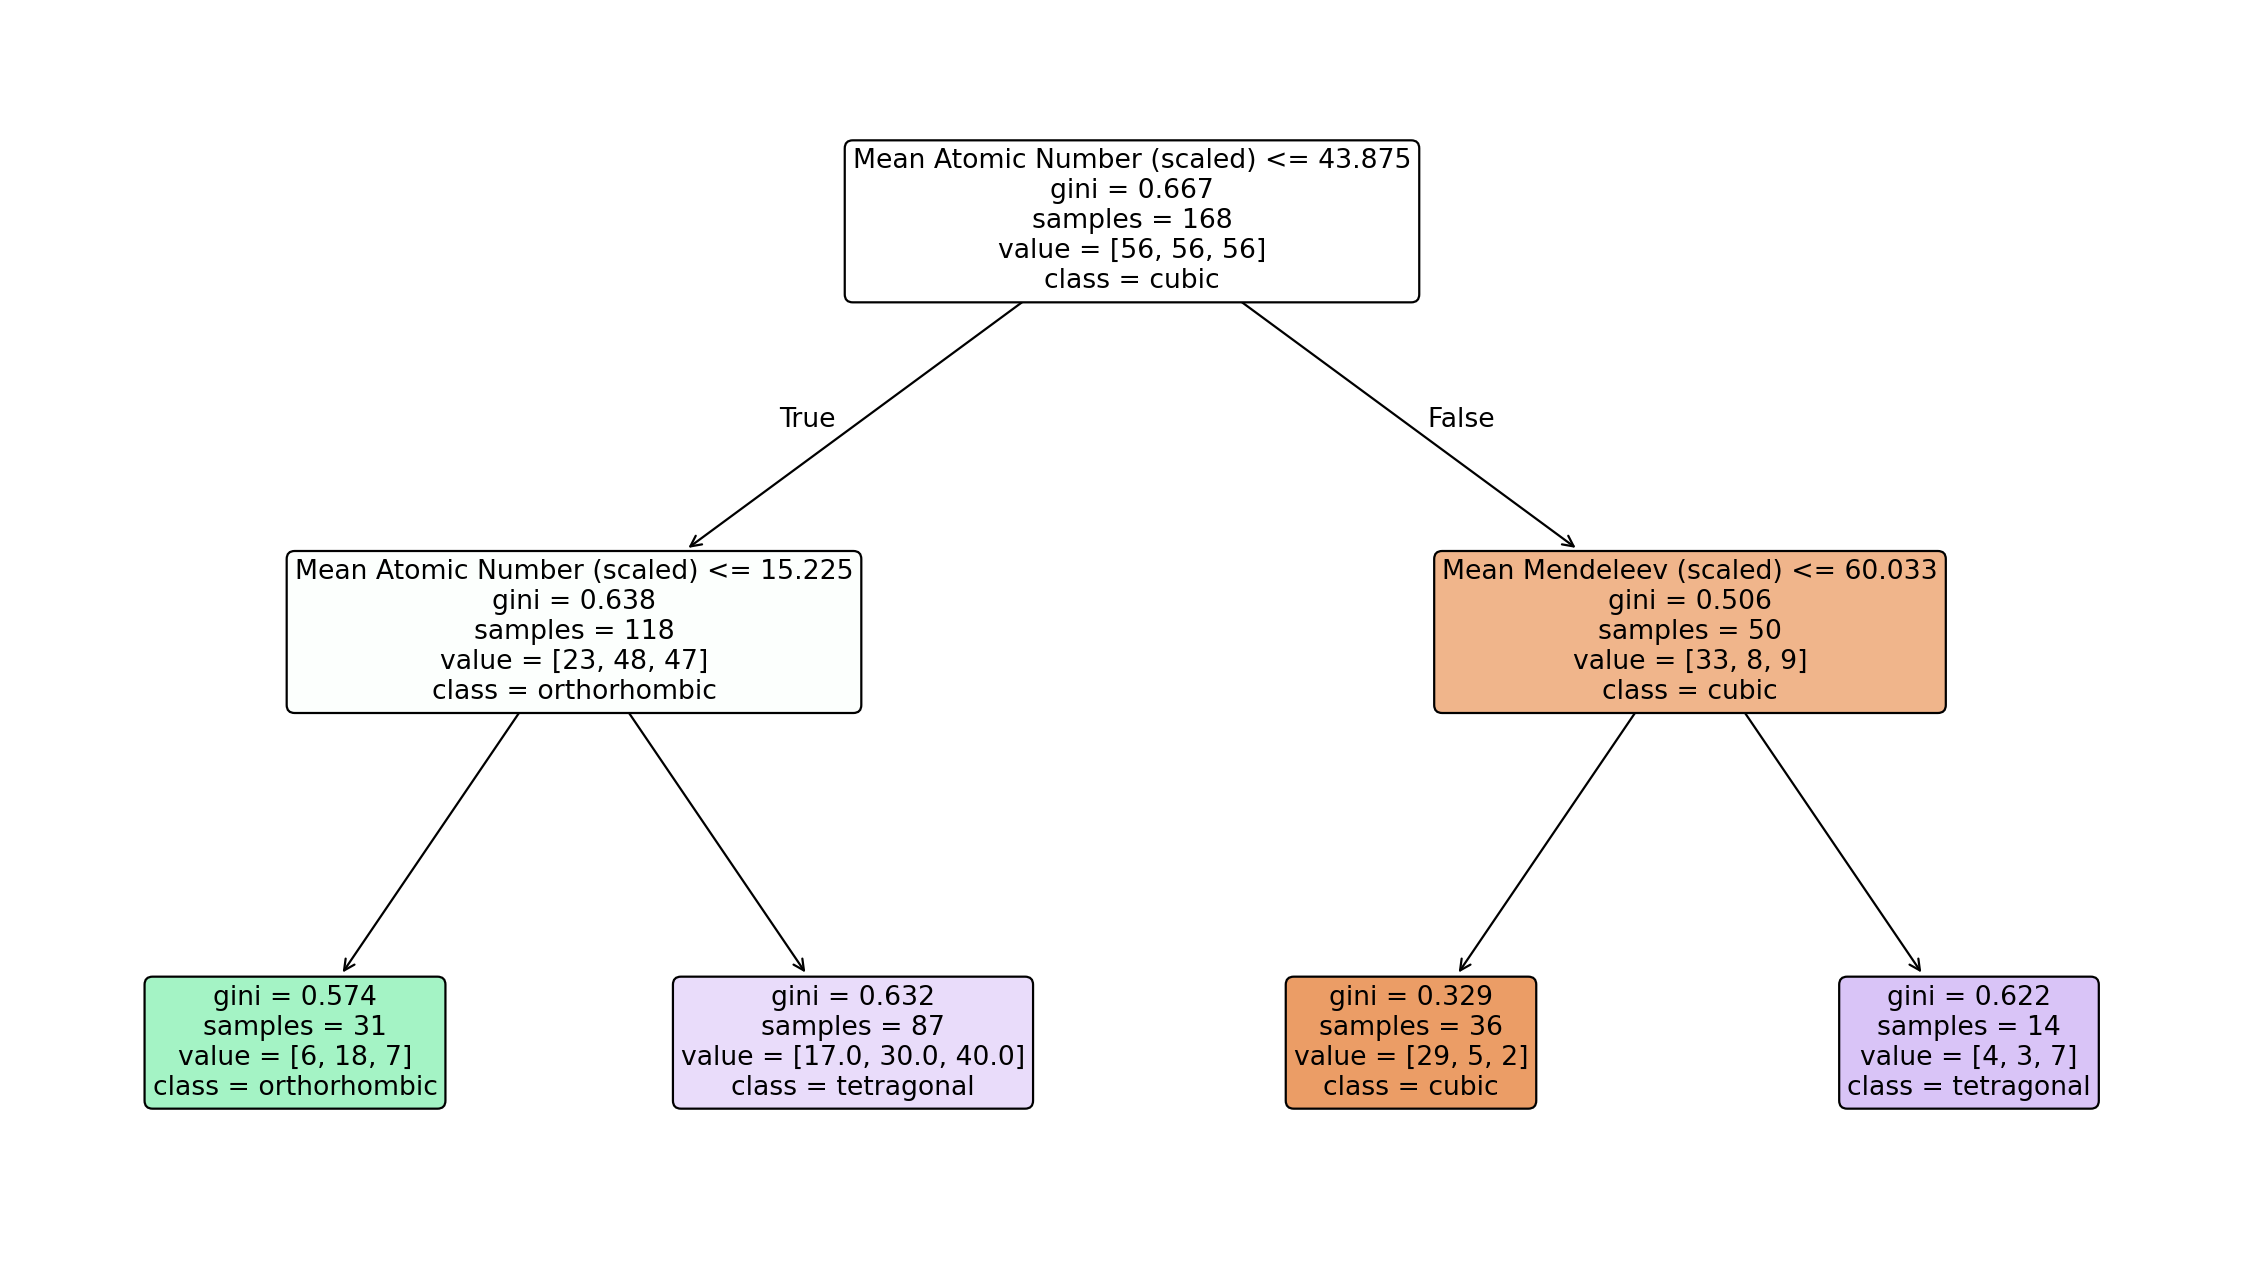

In [31]:
#title Decision Tree
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np



# --- Helper: decision regions that scale to 2–10 classes nicely ---
def plot_decision_regions(X, y, classifier, class_names, resolution=0.03):
    K = len(np.unique(y))
    palette = [mpl.colormaps['tab10'](i) for i in range(K)]
    cmap = ListedColormap(palette)
    markers = ['o','s','^','v','<','>','P','D','X','*'][:K]

    # robust axis bounds (avoid crashes with outliers)
    x1_min, x1_max = np.nanpercentile(X[:,0], [1, 99]); pad = 0.5
    x2_min, x2_max = np.nanpercentile(X[:,1], [1, 99])
    x1_min, x1_max = x1_min - pad, x1_max + pad
    x2_min, x2_max = x2_min - pad, x2_max + pad

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.30, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()); plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl, 0], X[y==cl, 1], alpha=0.9,
                    c=[palette[idx]], marker=markers[idx], edgecolor='black',
                    label=class_names[cl])

# --- Train decision tree ---
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=TREE_MAX_DEPTH, random_state=1)
tree_model.fit(X_train, y_train)
print("Decision Tree accuracy:", tree_model.score(X_test, y_test))

# --- Plot decision regions ---
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, class_names=classes)
plt.xlabel(f'{feature_names[0]} (scaled)'); plt.ylabel(f'{feature_names[1]} (scaled)')
plt.title(f"Decision Tree (max_depth={TREE_MAX_DEPTH}) — decision regions")
plt.legend(); plt.tight_layout(); plt.show()

# --- Plot the tree (top levels for readability) ---
fig, ax = plt.subplots(figsize=(18, 10), dpi=160)
plot_tree(
    tree_model,
    max_depth=min(TREE_MAX_DEPTH, 3),  # draw only the top levels
    feature_names=[f'{feature_names[0]} (scaled)', f'{feature_names[1]} (scaled)'],
    class_names=classes, filled=True, rounded=True, fontsize=12, ax=ax
)
plt.show()
